## Analysis of customer data to perform customer segmentation using K-means clustering.

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [97]:
marketing_data = pd.read_csv('https://raw.githubusercontent.com/federicoleo/programming_project_2022/main/marketing_data.csv', parse_dates = ['Dt_Customer'])

## Data Exploration and Cleaning.

In [98]:
marketing_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [99]:
marketing_data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND
2239,4070,1969,PhD,Married,"$94,871.00",0,2,2012-09-01,99,169,...,4,7,0,1,1,0,0,1,0,CA


In [100]:
marketing_data.shape

(2240, 28)

In [101]:
marketing_data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

**Column explanation:**
- ID=Customer's unique identifier
- Year_Birth=Customer's birth year
- Education=Customer's education level
- Marital_Status=Customer's marital status
- Income=Customer's yearly household income
- Kidhome=Number of children in customer's household
- Teenhome=Number of teenagers in customer's household
- Dt_Customer=Date of customer's enrollment with the company
- Recency=Number of days since customer's last purchase
- MntWines=Amount spent on wine in the last 2 years
- MntFruits=Amount spent on fruits in the last 2 years
- MntMeatProducts=Amount spent on meat in the last 2 years
- MntFishProducts=Amount spent on fish in the last 2 years
- MntSweetProducts=Amount spent on sweets in the last 2 years
- MntGoldProds=Amount spent on gold in the last 2 years
- NumDealsPurchases=Number of purchases made with a discount
- NumWebPurchases=Number of purchases made through the company's web site
- NumCatalogPurchases=Number of purchases made using a catalogue
- NumStorePurchases=Number of purchases made directly in stores
- NumWebVisitsMonth=Number of visits to company's web site in the last month
- AcceptedCmp1=1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2=1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3=1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4=1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5=1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response=1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain=1 if customer complained in the last 2 years, 0 otherwise
- Country=Customer's location



In [102]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4    Income              2216 non-null   object        
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [103]:
#Income column contains some null values. They will be dropped to operate properly on the rest of the data.
marketing_data.dropna(inplace=True)

**Also, the Income column contained some blank spaces in the title and the data type is object with the $ symbol.**

In [104]:
marketing_data.columns = marketing_data.columns.str.replace(' ', '')

In [105]:
marketing_data['Income'] = marketing_data['Income'].str.replace("[\$\,]", '').astype(float)

C:\Users\feder\AppData\Local\Temp/ipykernel_1488/156372468.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  marketing_data['Income'] = marketing_data['Income'].str.replace("[\$\,]", '').astype(float)


In [106]:
marketing_data['Income'] = marketing_data['Income'].astype(int)

**Outliers detection**

In [107]:
marketing_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


Outliers detection through Boxplots:

In [108]:
outliers_df = marketing_data.drop(['ID', 'AcceptedCmp1', 'Dt_Customer', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Education', 'Marital_Status'], axis = 1)

In [109]:
outliers_df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1970,84835,0,0,0,189,104,379,111,189,218,1,4,4,6,1
1,1961,57091,0,0,0,464,5,64,7,0,37,1,7,3,7,5
2,1958,67267,0,1,0,134,11,59,15,2,30,1,3,2,5,2
3,1967,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7
4,1989,21474,1,0,0,6,16,24,11,0,34,2,3,1,2,7


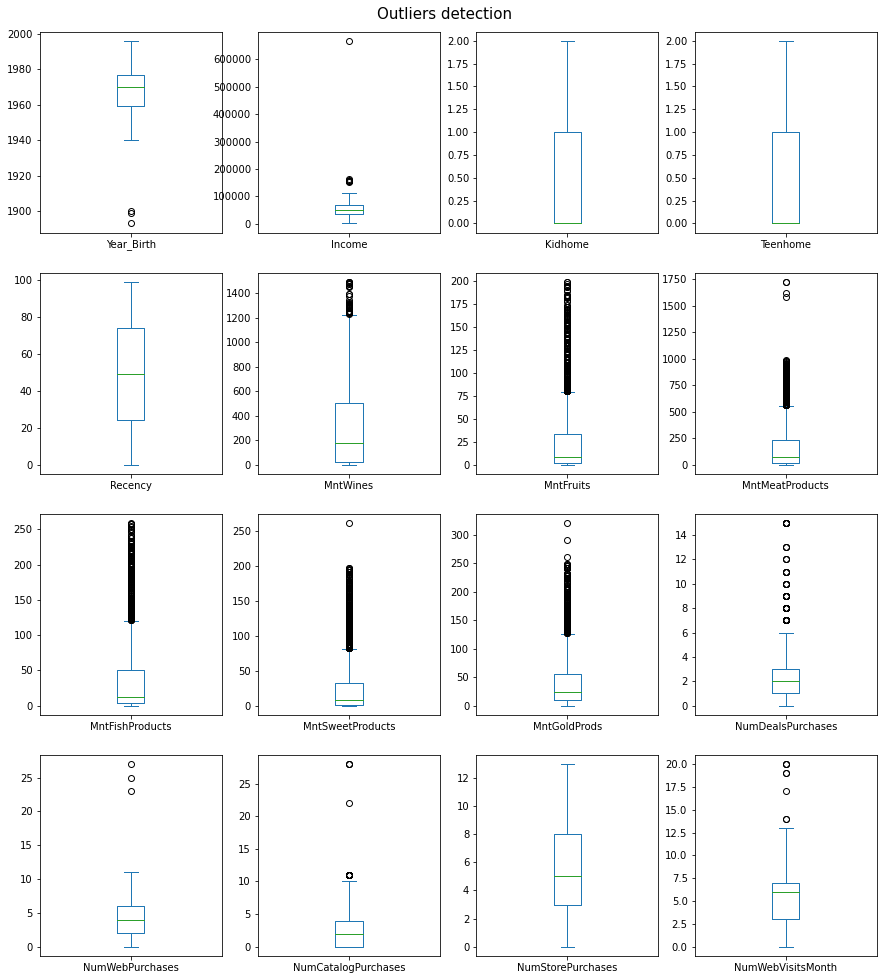

In [110]:
outliers_df.plot(subplots=True, layout=(4,4), kind='box', figsize=(15, 17))
plt.suptitle('Outliers detection', fontsize=15, y=0.9)
plt.savefig('fig')

Year_birth has outliers around 1900. It's very strasnge that >100yrs old people make purchases by themselves. For this reason a check of the Year_birth column is needed:

In [111]:
marketing_data['Year_Birth'].sort_values()

513     1893
827     1899
2233    1900
2171    1940
1740    1941
        ... 
1468    1995
964     1995
1467    1995
562     1996
1824    1996
Name: Year_Birth, Length: 2216, dtype: int64

There are 3 possible outliers which are 1893, 1899, 1900. The rows related to them are going to be dropped.

In [112]:
marketing_data = marketing_data[marketing_data['Year_Birth'] > 1939].reset_index()

In the Income column there is one outlier. Although it can be a natural one, it will be dropped in order to have the data more clear and visible especially in further analysis.

In [113]:
marketing_data['Income'].sort_values()

1452      1730
952       2447
1278      3502
656       4023
14        4428
         ...  
2178    157243
845     157733
493     160803
724     162397
521     666666
Name: Income, Length: 2213, dtype: int32

In [114]:
marketing_data = marketing_data[marketing_data['Income'] < 666666]

The others features which seem like outliers from the boxplot can be considered as natural outliers and there is no need to drop them.

In [115]:
marketing_data.describe()

,index,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,1117.508590,5585.160940,1968.913653,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,...,2.672242,5.806510,5.321429,0.073689,0.074141,0.072785,0.064195,0.013562,0.150542,0.009042
std,646.324296,3247.523735,11.701599,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,...,2.927542,3.250939,2.425597,0.261323,0.262060,0.259842,0.245156,0.115691,0.357683,0.094678
min,0.000000,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,559.750000,2814.750000,1959.000000,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1117.500000,5454.500000,1970.000000,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1675.250000,8418.500000,1977.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2239.000000,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Let's do feature engineering in order to add features to the dataset**



In [116]:
marketing_data['Tot_amount'] = marketing_data['MntWines'] + marketing_data['MntFruits'] + marketing_data['MntMeatProducts'] + marketing_data['MntFishProducts'] + marketing_data['MntSweetProducts'] + marketing_data['MntGoldProds']

In [117]:
marketing_data['Tot_purchases'] = marketing_data['NumStorePurchases'] + marketing_data['NumCatalogPurchases'] + marketing_data['NumWebPurchases']
#we excluded the NumDealsPurchsed because it could result in a double counting for orders because it is not specified whether e.g. a WebPurchase could have been made with a deal.

In [118]:
marketing_data['Average amount'] = marketing_data['Tot_amount'] / marketing_data['Tot_purchases']

In [119]:
#New Columns overview
marketing_data[['Tot_amount', 'Tot_purchases', 'Average amount']].describe()

,Tot_amount,Tot_purchases,Average amount
count,2212.000000,2212.000000,2212.000000
mean,607.268083,12.566908,inf
std,602.513364,7.205427,NaN
min,5.000000,0.000000,2.666667
25%,69.000000,6.000000,13.000000
50%,397.000000,12.000000,30.000000
75%,1048.000000,18.250000,50.250000
max,2525.000000,32.000000,inf


Here some weird data in the average amount column are noticed. The mean result is infinite and we can also notice that the minimum value of Tot_purchase is 0. This means that some of the customer didn't make any purchase but spent an amount on some goods. This is very strange or maybe they got some free products thanks to coupons or special offers. 

In [120]:
marketing_data['Tot_purchases'].value_counts().sort_index(ascending=True)

0       6
1       5
2       2
3     124
4     200
5     178
6     188
7     126
8      50
9      44
10     54
11     77
12     62
13     75
14     97
15     83
16     98
17     88
18    102
19     85
20     85
21     85
22     75
23     63
24     52
25     39
26     24
27     22
28     10
29      6
30      2
31      2
32      3
Name: Tot_purchases, dtype: int64

There are 6 customers who purchased 0 products. For calculations and given that they're a very small portion of the customers it is better to drop the rows related to them.

In [121]:
marketing_data = marketing_data[marketing_data['Tot_purchases'] != 0]

In [122]:
marketing_data.describe()

,index,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Tot_amount,Tot_purchases,Average amount
count,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,...,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000
mean,1117.090662,5578.323663,1968.921578,51952.821850,0.441976,0.506800,49.000453,306.111967,26.398912,167.480054,...,0.073889,0.074343,0.072983,0.064370,0.013599,0.150952,0.009066,608.900725,12.601088,37.551072
std,646.519442,3245.998622,11.707730,21230.066444,0.537093,0.544358,28.952216,337.410262,39.775794,224.392868,...,0.261650,0.262387,0.260167,0.245466,0.115847,0.358083,0.094805,602.517245,7.185301,30.065927
min,0.000000,0.000000,1940.000000,2447.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.666667
25%,559.250000,2811.750000,1959.000000,35352.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,6.000000,13.000000
50%,1116.500000,5447.000000,1970.000000,51381.500000,0.000000,0.000000,49.000000,177.500000,8.000000,68.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,399.000000,12.000000,29.923077
75%,1674.750000,8415.500000,1977.000000,68480.750000,1.000000,1.000000,74.000000,506.500000,33.000000,233.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1048.750000,19.000000,49.416667
max,2239.000000,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000,32.000000,187.666667


Lastly, the Year_Birth column is splitted into different year birth categories.

In [123]:
#creating year_birth_categories

def dividing_year_birth(year):
  if year >= 1940 and year <= 1954:
    return '1940-1954'
  elif year > 1954 and year <= 1968:
    return '1955-1968'
  elif year > 1968 and year <= 1982:
    return '1969-1982'
  else:
    return '1983-1996'

In [124]:
marketing_data['Year_birth_category'] = marketing_data['Year_Birth'].apply(dividing_year_birth)

In [125]:
marketing_data[['Year_birth_category', 'Year_Birth']]

,Year_birth_category,Year_Birth
0,1969-1982,1970
1,1955-1968,1961
2,1955-1968,1958
3,1955-1968,1967
4,1983-1996,1989
...,...,...
2208,1969-1982,1976
2209,1969-1982,1977
2210,1969-1982,1976
2211,1969-1982,1978


**Average customer look-a-like**

In [126]:
average_customer = marketing_data.describe().loc['mean']
average_customer

index                   1117.090662
ID                      5578.323663
Year_Birth              1968.921578
Income                 51952.821850
Kidhome                    0.441976
Teenhome                   0.506800
Recency                   49.000453
MntWines                 306.111967
MntFruits                 26.398912
MntMeatProducts          167.480054
MntFishProducts           37.748867
MntSweetProducts          27.118314
MntGoldProds              44.042611
NumDealsPurchases          2.317316
NumWebPurchases            4.099275
NumCatalogPurchases        2.679510
NumStorePurchases          5.822303
NumWebVisitsMonth          5.305530
AcceptedCmp3               0.073889
AcceptedCmp4               0.074343
AcceptedCmp5               0.072983
AcceptedCmp1               0.064370
AcceptedCmp2               0.013599
Response                   0.150952
Complain                   0.009066
Tot_amount               608.900725
Tot_purchases             12.601088
Average amount            37

The average customer of the company is a man born in 1968, with an income of $50k who spended in the last two years 300 dollars in Wine, 167 in Meat, 37 in Fish, 27 in Sweets, 26 in fruits and 44 in gold products. In total, he spended more than 600 dollars in the shop/web making around 12 purchases with an average order amount of 37 dollars.

**Let's take a look on how the different marketing campaigns performed based on conversion rate, i.e. the percentage of customers who actually made a purchase thanks to the specific campaign out of all the customers involved.**

In [127]:
#Conversion rate for each campaign

def conversion_rate_func(column):
  total = marketing_data['ID'].nunique()
  subscribers = marketing_data[marketing_data[column]== 1]['ID'].nunique()
  conversion_rate = subscribers / total * 100
  return str(round(conversion_rate, 1))+' %'

campaigns_df = marketing_data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]

for x in campaigns_df:
  count = range(len(campaigns_df))
  print('The conversion rate for campaign {} is'.format(x[-1]), conversion_rate_func(x))


The conversion rate for campaign 1 is 6.4 %
The conversion rate for campaign 2 is 1.4 %
The conversion rate for campaign 3 is 7.4 %
The conversion rate for campaign 4 is 7.4 %
The conversion rate for campaign 5 is 7.3 %
The conversion rate for campaign e is 15.1 %


Here it can be seen that the last campaign was the one which performed better, the marketing team should concentrate on the strategies and channels used in this last campaign or use it as a starting point on which to develop further marketing efforts.

**Correlation heatmap**

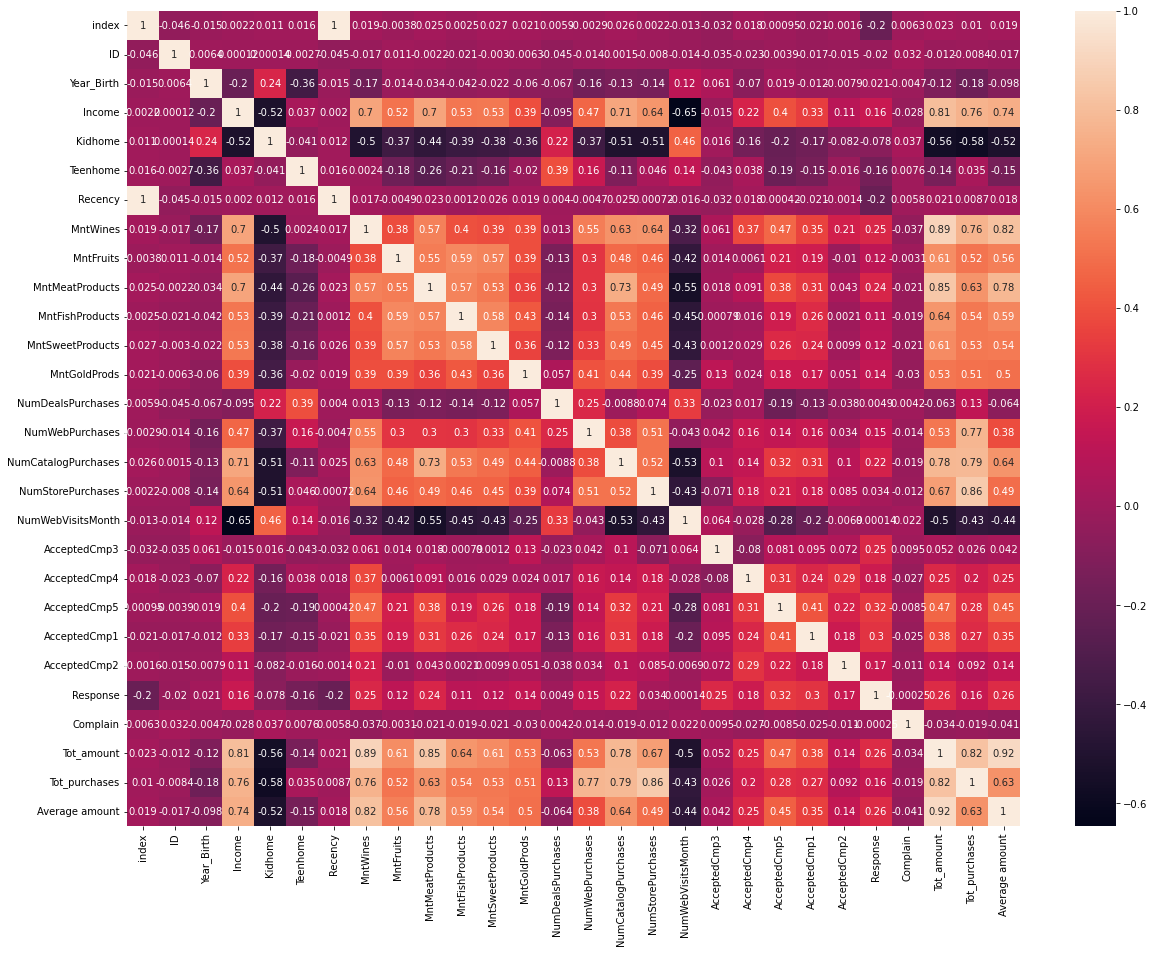

In [128]:
plt.figure(figsize=(20, 15))
sns.heatmap(marketing_data.corr(), annot=True);

**From the correlation heatmap many patterns are enlightened:**

1. Income:
    - People with higher income tend to spend more and to make more purchases.
    - As Income increase, people tend to purchase more in store or through catalog, while the Web Purchases amount is negatively correlated to the increase in income.
    - In particular, higher income means higher expenditure on products like Wine and Meat Products.


2. Year of Birth:
    - Year birth tends to be uncorrelated or negatively correlated with all the features involved.
    - As customers are younger they tend to have lower income, so they purchase less and have less teen or kids at home.


3. People with kids:
    - spend way less in particular on products like wine.
    - Tend to purchase more using deals such as coupon or discounts.


4. As the average amount increase:
    - people spend more on products such wines, meat and fish.
    - people tend to purchase throug shops or catalog instead of the website of the company.


## Data Visualization.

Show interesting plots about the dataset.

**First, we will see some plots to show personal features of the customers.**

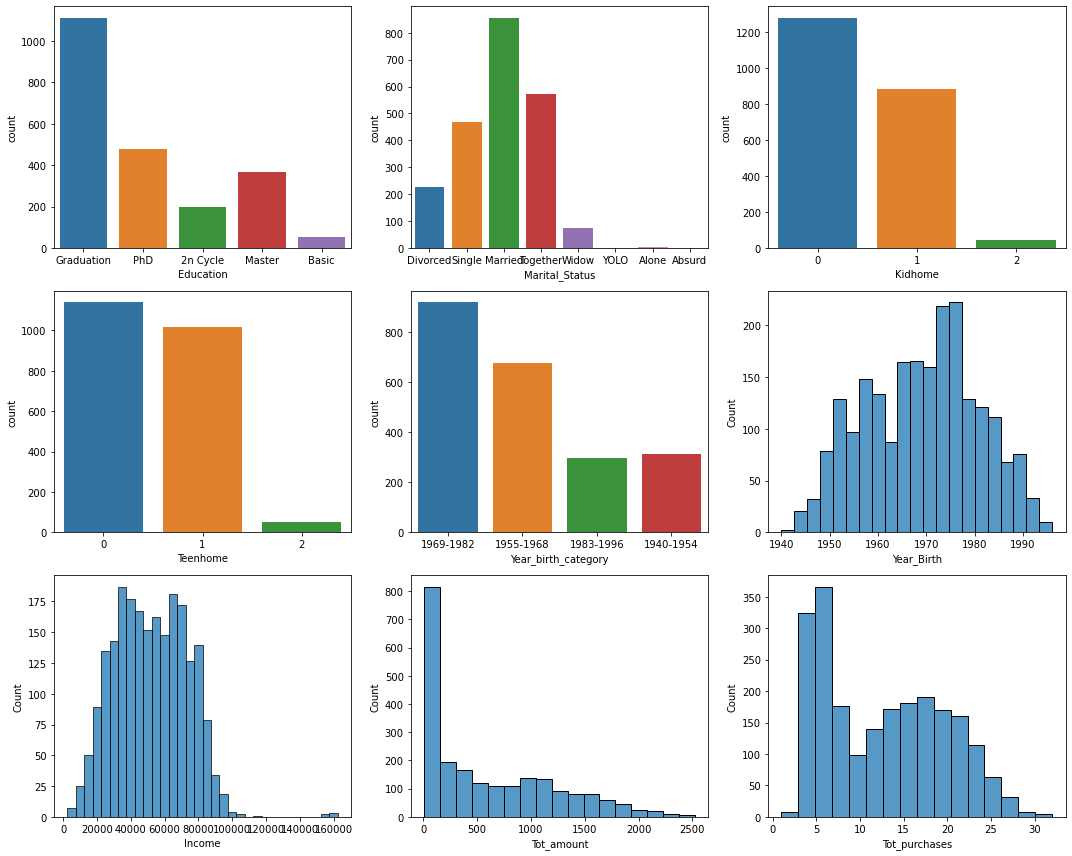

In [129]:
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(15,12))
sns.countplot(ax=ax[0, 0],x='Education',data=marketing_data)
sns.countplot(ax=ax[0, 1],x='Marital_Status',data=marketing_data)
sns.countplot(ax=ax[0, 2],x='Kidhome',data=marketing_data)
sns.countplot(ax=ax[1, 0],x='Teenhome',data=marketing_data)
sns.countplot(ax=ax[1,1],x='Year_birth_category', data=marketing_data)
sns.histplot(ax=ax[1,2], x='Year_Birth', data = marketing_data)
sns.histplot(ax=ax[2,0], x='Income', data = marketing_data)
sns.histplot(ax=ax[2,1], x='Tot_amount', data = marketing_data)
sns.histplot(ax=ax[2,2], x='Tot_purchases', data = marketing_data)



fig.tight_layout()

**Correlation between amount of wine and average amount purchased**

In [130]:
wine_income_df = marketing_data[marketing_data['MntWines']!=0][['MntWines', 'Income']]
meat_income_df = marketing_data[marketing_data['MntMeatProducts']!=0][['MntMeatProducts', 'Income']]

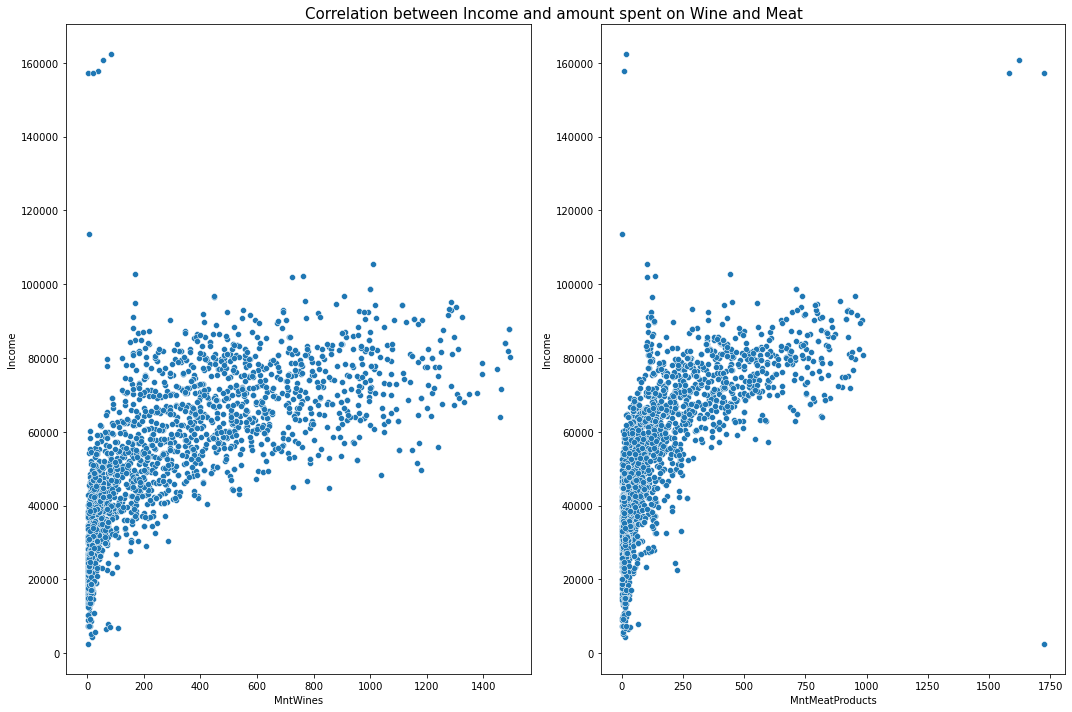

In [131]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,10))
sns.scatterplot(ax=ax[0],x='MntWines', y='Income', data=wine_income_df)
sns.scatterplot(ax=ax[1],x='MntMeatProducts',y = 'Income', data=meat_income_df);
plt.title('Correlation between Income and amount spent on Wine and Meat', x=-0.1, fontsize=15)
fig.tight_layout()

Here it is clear how STRONG is the correlation between the amount of wine and meat purchased and the income of each customer. Being them, especially wine, not a basic necessity, the more a person can spend, the more they are spending on whims such wine and meat. It can be clearly seen here where after a certain point the amount spent on the specific product increase considerably.

**Now let's take a look at how the different campaign performed across different age-categories.**

In [132]:
Cmp1 = marketing_data[marketing_data['AcceptedCmp1']==1].groupby(['Year_birth_category'])['ID'].nunique()
Cmp2 = marketing_data[marketing_data['AcceptedCmp2']==1].groupby(['Year_birth_category'])['ID'].nunique()
Cmp3 = marketing_data[marketing_data['AcceptedCmp3']==1].groupby(['Year_birth_category'])['ID'].nunique()
Cmp4 = marketing_data[marketing_data['AcceptedCmp4']==1].groupby(['Year_birth_category'])['ID'].nunique()
Cmp5 = marketing_data[marketing_data['AcceptedCmp5']==1].groupby(['Year_birth_category'])['ID'].nunique()
Response = marketing_data[marketing_data['Response']==1].groupby(['Year_birth_category'])['ID'].nunique()



In [133]:
accepted_campaigns = pd.concat([Cmp1, Cmp2, Cmp3, Cmp4, Cmp5, Response], axis=1)
accepted_campaigns.columns = ['Cmp1', 'Cmp2', 'Cmp3', 'Cmp4', 'Cmp5', 'Response']

In [134]:
accepted_campaigns

,Cmp1,Cmp2,Cmp3,Cmp4,Cmp5,Response
Year_birth_category,,,,,,
1940-1954,25,2,19,28,30,49
1955-1968,43,13,36,64,38,88
1969-1982,47,11,76,59,58,138
1983-1996,27,4,32,13,35,58


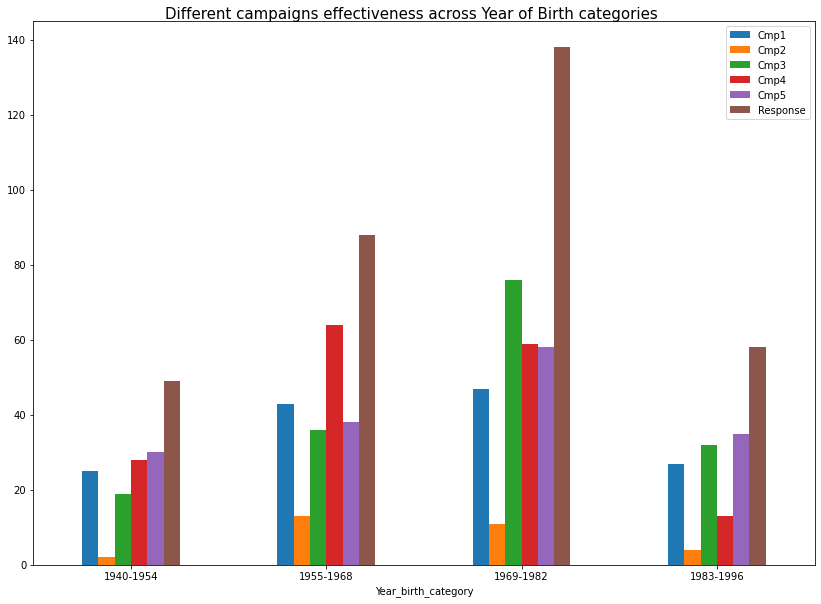

In [135]:
ax = accepted_campaigns.plot(kind='bar', figsize=(14, 10))
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['1940-1954', '1955-1968', '1969-1982', '1983-1996'], rotation = 0)
plt.suptitle('Different campaigns effectiveness across Year of Birth categories', fontsize=15, y=0.9);
plt.savefig('age')

There is no particular pattern enlightened by this particular grouping, the performance of the different campaign reflects the bigger picture of the whole dataset.

## Find a Model that explains the data.

**Customer segmentation using K-means clustering**

The purpose is to divide the data space or data points into a number of groups, such that data points in the same groups are more similar to other data points in the same group, and dissimilar to the data points in other groups.
Clustering identifies what people do most of the times in order to predict what customers are more likely to do moving forward.

In [136]:
backup_df = marketing_data.reset_index()

In [137]:
backup_df.head()

,level_0,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Tot_amount,Tot_purchases,Average amount,Year_birth_category
0,0,0,1826,1970,Graduation,Divorced,84835,0,0,2014-06-16,...,0,0,0,1,0,SP,1190,14,85.000000,1969-1982
1,1,1,1,1961,Graduation,Single,57091,0,0,2014-06-15,...,0,0,1,1,0,CA,577,17,33.941176,1955-1968
2,2,2,10476,1958,Graduation,Married,67267,0,1,2014-05-13,...,0,0,0,0,0,US,251,10,25.100000,1955-1968
3,3,3,1386,1967,Graduation,Together,32474,1,1,2014-05-11,...,0,0,0,0,0,AUS,11,3,3.666667,1955-1968
4,4,4,5371,1989,Graduation,Single,21474,1,0,2014-04-08,...,0,0,0,1,0,SP,91,6,15.166667,1983-1996


In [138]:
backup_df = backup_df.iloc[:,2:]

In [139]:
backup_df['Average amount'] = backup_df['Average amount'].astype(int)

In [140]:
backup_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Tot_amount,Tot_purchases,Average amount,Year_birth_category
0,1826,1970,Graduation,Divorced,84835,0,0,2014-06-16,0,189,...,0,0,0,1,0,SP,1190,14,85,1969-1982
1,1,1961,Graduation,Single,57091,0,0,2014-06-15,0,464,...,0,0,1,1,0,CA,577,17,33,1955-1968
2,10476,1958,Graduation,Married,67267,0,1,2014-05-13,0,134,...,0,0,0,0,0,US,251,10,25,1955-1968
3,1386,1967,Graduation,Together,32474,1,1,2014-05-11,0,10,...,0,0,0,0,0,AUS,11,3,3,1955-1968
4,5371,1989,Graduation,Single,21474,1,0,2014-04-08,0,6,...,0,0,0,1,0,SP,91,6,15,1983-1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,10142,1976,PhD,Divorced,66476,0,1,2013-03-07,99,372,...,0,0,0,0,0,US,689,18,38,1969-1982
2202,5263,1977,2n Cycle,Married,31056,1,0,2013-01-22,99,5,...,0,0,0,0,0,SP,55,4,13,1969-1982
2203,22,1976,Graduation,Divorced,46310,1,0,2012-12-03,99,185,...,0,0,0,0,0,SP,309,12,25,1969-1982
2204,528,1978,Graduation,Married,65819,0,0,2012-11-29,99,267,...,0,0,0,0,0,IND,1383,19,72,1969-1982


The columns 'Dt_Customer' and 'Recency' are dropped because are not of interest of the analysis:

In [141]:
backup_df.drop(['Dt_Customer', 'Recency'], axis=1, inplace=True)

In [142]:
backup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2206 entries, 0 to 2205
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2206 non-null   int64 
 1   Year_Birth           2206 non-null   int64 
 2   Education            2206 non-null   object
 3   Marital_Status       2206 non-null   object
 4   Income               2206 non-null   int32 
 5   Kidhome              2206 non-null   int64 
 6   Teenhome             2206 non-null   int64 
 7   MntWines             2206 non-null   int64 
 8   MntFruits            2206 non-null   int64 
 9   MntMeatProducts      2206 non-null   int64 
 10  MntFishProducts      2206 non-null   int64 
 11  MntSweetProducts     2206 non-null   int64 
 12  MntGoldProds         2206 non-null   int64 
 13  NumDealsPurchases    2206 non-null   int64 
 14  NumWebPurchases      2206 non-null   int64 
 15  NumCatalogPurchases  2206 non-null   int64 
 16  NumSto

In order to perform the K-means clustering algorithm, only need numerical variables are needed given the fact that it performs the clustering of data calculating and trying to minimize the euclidean distance between the k centroids of the clusters and the data points around each centroid. Then it finds the mean of each new cluster to establish a new centroid.

In [143]:
numeric_df = backup_df.select_dtypes(include='int')

In [144]:
#we drop ID column because does not tell anything about the data.
numeric_df = numeric_df.drop('ID', axis=1)

In order to define K (i.e. the optimal number of clusters), it is recommended to use the so-called "elbow criterion". It finds the number of clusters for which adding an extra cluster would not add sufficient information or would cause overfitting.

The elbow plot presents the ratio of within cluster to between clusters on the y-axis and the number of clusters on the x-axis. There will come a point in which the ratio will not decrease so much by adding a new cluster. The elbow plot is the ideal number of clusters.

In [145]:
#Elbow method to find the optimal number of k-clusters

square_distances = []
x = numeric_df
for i in range(1,12):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(x)
    square_distances.append(km.inertia_)

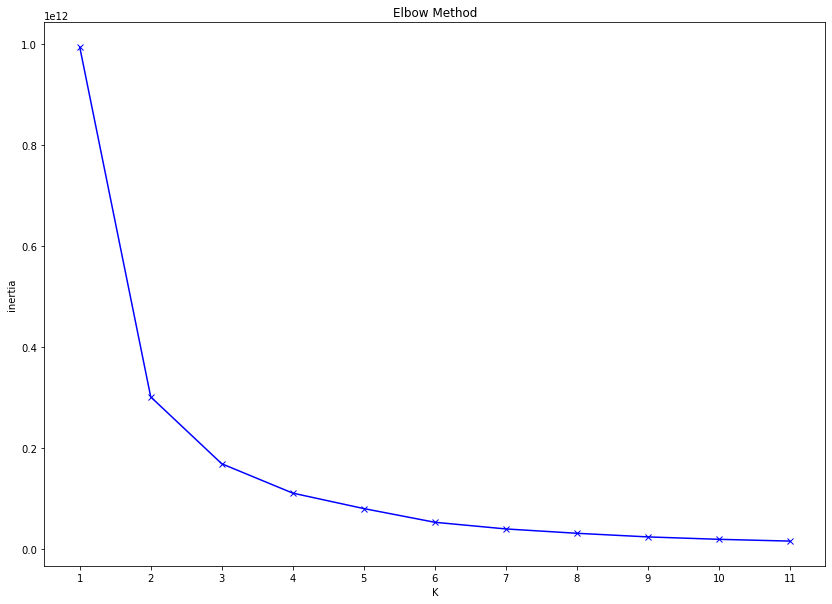

In [146]:
plt.figure(figsize=(14,10))
plt.plot(range(1,12), square_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('inertia')
plt.title('Elbow Method')
plt.xticks(list(range(1,12)))

plt.savefig('elbow.png')

In this case, k=3 seems the optimal number of clusters.

In [147]:
#Now we will feat the K-means clustering model on our data 'numeric_df' with 3 clusters. 

km = KMeans(n_clusters=3, random_state=42)
backup_df['cluster'] = km.fit_predict(x)
#after we add the cluster column to the backup_df which is the df with all the numeric and categorical data we had before choosing only the numeric.

In [148]:
#replacing of 0,1,2 with 1,2,3 so we have Cluster 1, Cluster 2, Cluster 3
backup_df['cluster'] = backup_df['cluster'].replace({0:1, 1:2, 2:3}) 

Now by putting the cluster into the dataframe it is possible to group them and see the average quantities for each cluster:

In [149]:
backup_df.groupby('cluster').mean().T

cluster,1,2,3
ID,5637.306233,5756.086957,5364.717224
Year_Birth,1973.228997,1967.528986,1966.070694
Income,28503.879404,76622.739130,52316.673522
Kidhome,0.810298,0.088406,0.406170
Teenhome,0.314363,0.356522,0.822622
MntWines,30.777778,618.504348,290.232648
MntFruits,6.013550,57.033333,18.566838
MntMeatProducts,25.712737,397.166667,98.251928
MntFishProducts,9.108401,82.608696,25.131105
MntSweetProducts,6.073171,60.126087,17.807198


Now it is better to take a closer look and analyze each cluster individually and in the end draw conclusions.

**Cluster 1 in depth:**

In [150]:
Cluster_1 = backup_df[backup_df['cluster']==1]

In [151]:
Cluster_1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Tot_amount,Tot_purchases,Average amount,Year_birth_category,cluster
3,1386,1967,Graduation,Together,32474,1,1,10,0,1,...,0,0,0,0,AUS,11,3,3,1955-1968,1
4,5371,1989,Graduation,Single,21474,1,0,6,16,24,...,0,0,1,0,SP,91,6,15,1983-1996,1
13,2964,1981,Graduation,Married,26872,0,0,3,10,8,...,0,0,0,0,CA,72,4,18,1969-1982,1
14,10311,1969,Graduation,Married,4428,0,1,16,4,12,...,0,0,0,0,SP,359,25,14,1969-1982,1
17,10175,1958,PhD,Divorced,32173,0,1,18,0,2,...,0,0,0,0,SP,22,4,5,1955-1968,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,5871,1979,Master,Together,24401,0,0,73,28,217,...,0,0,0,0,SA,467,13,35,1969-1982,1
2189,10001,1985,2n Cycle,Together,7500,1,0,5,17,17,...,0,0,0,0,SP,100,6,16,1983-1996,1
2196,2106,1974,2n Cycle,Married,20130,0,0,0,6,3,...,0,0,0,0,SP,34,4,8,1969-1982,1
2197,3363,1974,2n Cycle,Married,20130,0,0,0,6,3,...,0,0,0,0,SP,34,4,8,1969-1982,1


In [152]:
Cluster_1.describe().loc['mean',:]

ID                      5637.306233
Year_Birth              1973.228997
Income                 28503.879404
Kidhome                    0.810298
Teenhome                   0.314363
MntWines                  30.777778
MntFruits                  6.013550
MntMeatProducts           25.712737
MntFishProducts            9.108401
MntSweetProducts           6.073171
MntGoldProds              17.821138
NumDealsPurchases          2.113821
NumWebPurchases            2.170732
NumCatalogPurchases        0.529810
NumStorePurchases          3.100271
NumWebVisitsMonth          6.857724
AcceptedCmp3               0.085366
AcceptedCmp4               0.004065
AcceptedCmp5               0.000000
AcceptedCmp1               0.001355
AcceptedCmp2               0.000000
Response                   0.115176
Complain                   0.014905
Tot_amount                95.506775
Tot_purchases              5.800813
Average amount            13.550136
cluster                    1.000000
Name: mean, dtype: float64

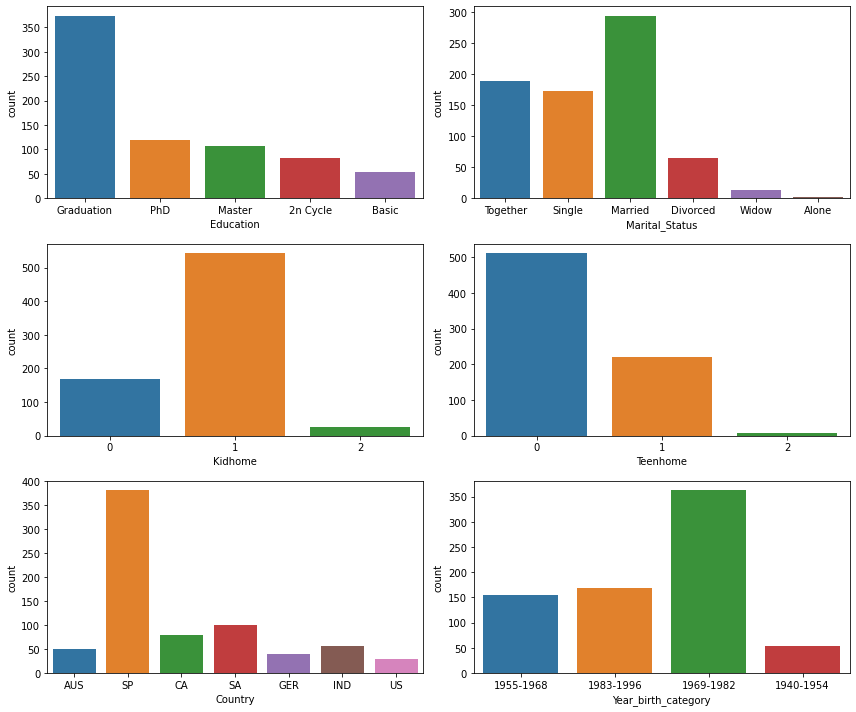

In [153]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(12,10))
sns.countplot(ax=ax[0, 0],x='Education',data=Cluster_1)
sns.countplot(ax=ax[0, 1],x='Marital_Status',data=Cluster_1)
sns.countplot(ax=ax[1, 0],x='Kidhome',data=Cluster_1)
sns.countplot(ax=ax[1, 1],x='Teenhome',data=Cluster_1)
sns.countplot(ax=ax[2,0], x='Country', data=Cluster_1)
sns.countplot(ax=ax[2,1], x='Year_birth_category', data=Cluster_1)


fig.tight_layout()

In [154]:
#Spending Habits
cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for x in cols:
    print('The average {} for cluster 1 is '.format(x), Cluster_1[x].mean())

The average MntWines for cluster 1 is  30.77777777777778
The average MntFruits for cluster 1 is  6.013550135501355
The average MntMeatProducts for cluster 1 is  25.712737127371273
The average MntFishProducts for cluster 1 is  9.10840108401084
The average MntSweetProducts for cluster 1 is  6.073170731707317
The average MntGoldProds for cluster 1 is  17.821138211382113


In [155]:
#Purchasing Behavior
parameter = ['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases']
for x in parameter:
    print('The average {} for cluster 1 are '.format(x), Cluster_1[x].mean())

The average NumStorePurchases for cluster 1 are  3.100271002710027
The average NumWebPurchases for cluster 1 are  2.1707317073170733
The average NumCatalogPurchases for cluster 1 are  0.5298102981029811


**Cluster 2 in depth**

In [156]:
Cluster_2 = backup_df[backup_df['cluster']==2]
Cluster_2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Tot_amount,Tot_purchases,Average amount,Year_birth_category,cluster
0,1826,1970,Graduation,Divorced,84835,0,0,189,104,379,...,0,0,1,0,SP,1190,14,85,1969-1982,2
2,10476,1958,Graduation,Married,67267,0,1,134,11,59,...,0,0,0,0,US,251,10,25,1955-1968,2
5,7348,1958,PhD,Single,71691,0,0,336,130,411,...,0,0,1,0,SP,1192,16,74,1955-1968,2
8,4047,1954,PhD,Married,65324,0,1,384,0,102,...,0,0,0,0,US,544,17,32,1940-1954,2
9,9477,1954,PhD,Married,65324,0,1,384,0,102,...,0,0,0,0,IND,544,17,32,1940-1954,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,1743,1974,Graduation,Single,69719,0,0,273,86,208,...,0,0,0,0,SP,801,10,80,1969-1982,2
2200,9977,1973,Graduation,Divorced,78901,0,1,321,11,309,...,0,0,0,0,US,734,17,43,1969-1982,2
2201,10142,1976,PhD,Divorced,66476,0,1,372,18,126,...,0,0,0,0,US,689,18,38,1969-1982,2
2204,528,1978,Graduation,Married,65819,0,0,267,38,701,...,0,0,0,0,IND,1383,19,72,1969-1982,2


In [157]:
Cluster_2.describe().loc['mean',:]

ID                      5756.086957
Year_Birth              1967.528986
Income                 76622.739130
Kidhome                    0.088406
Teenhome                   0.356522
MntWines                 618.504348
MntFruits                 57.033333
MntMeatProducts          397.166667
MntFishProducts           82.608696
MntSweetProducts          60.126087
MntGoldProds              70.295652
NumDealsPurchases          1.627536
NumWebPurchases            5.434783
NumCatalogPurchases        5.446377
NumStorePurchases          8.427536
NumWebVisitsMonth          3.188406
AcceptedCmp3               0.071014
AcceptedCmp4               0.134783
AcceptedCmp5               0.227536
AcceptedCmp1               0.182609
AcceptedCmp2               0.026087
Response                   0.237681
Complain                   0.007246
Tot_amount              1285.734783
Tot_purchases             19.308696
Average amount            68.197101
cluster                    2.000000
Name: mean, dtype: float64

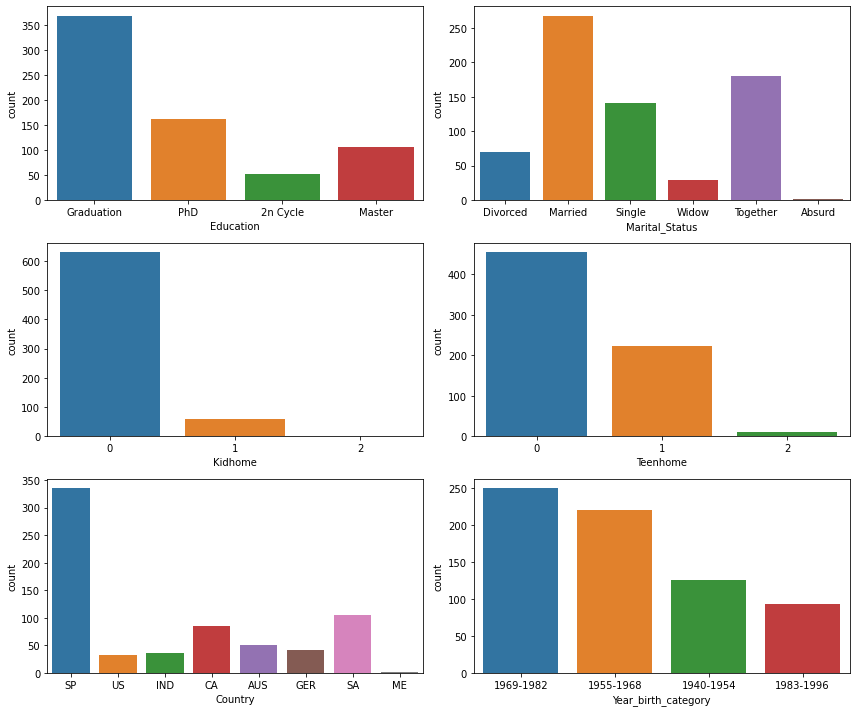

In [158]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(12,10))
sns.countplot(ax=ax[0, 0],x='Education',data=Cluster_2)
sns.countplot(ax=ax[0, 1],x='Marital_Status',data=Cluster_2)
sns.countplot(ax=ax[1, 0],x='Kidhome',data=Cluster_2)
sns.countplot(ax=ax[1, 1],x='Teenhome',data=Cluster_2)
sns.countplot(ax=ax[2, 0], x='Country', data=Cluster_2)
sns.countplot(ax=ax[2, 1], x='Year_birth_category', data=Cluster_2)

fig.tight_layout()

In [159]:
#Spending Habits
cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for x in cols:
    print('The average {} for cluster 2 is '.format(x), Cluster_2[x].mean())

The average MntWines for cluster 2 is  618.5043478260869
The average MntFruits for cluster 2 is  57.03333333333333
The average MntMeatProducts for cluster 2 is  397.1666666666667
The average MntFishProducts for cluster 2 is  82.6086956521739
The average MntSweetProducts for cluster 2 is  60.12608695652174
The average MntGoldProds for cluster 2 is  70.29565217391304


In [160]:
#Purchasing Behavior
parameter = ['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases']
for x in parameter:
    print('The average {} for cluster 1 are '.format(x), Cluster_2[x].mean())

The average NumStorePurchases for cluster 1 are  8.427536231884059
The average NumWebPurchases for cluster 1 are  5.434782608695652
The average NumCatalogPurchases for cluster 1 are  5.446376811594203


**Cluster 3 in depth**

In [161]:
Cluster_3 = backup_df[backup_df['cluster']==3]
Cluster_3

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Tot_amount,Tot_purchases,Average amount,Year_birth_category,cluster
1,1,1961,Graduation,Single,57091,0,0,464,5,64,...,0,1,1,0,CA,577,17,33,1955-1968,3
6,4073,1954,2n Cycle,Married,63564,0,0,769,80,252,...,0,0,1,0,GER,1215,27,45,1940-1954,3
7,1991,1967,Graduation,Together,44931,0,1,78,0,11,...,0,0,0,0,SP,96,6,16,1955-1968,3
11,5642,1979,Master,Together,62499,1,0,140,4,61,...,0,0,0,0,SP,222,10,22,1969-1982,3
15,837,1977,Graduation,Married,54809,1,1,63,6,57,...,0,0,0,0,SP,174,8,21,1969-1982,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,2415,1962,Graduation,Together,62568,0,1,362,17,398,...,1,0,0,0,SP,953,13,73,1955-1968,3
2195,7947,1969,Graduation,Married,42231,1,1,24,0,8,...,0,0,0,0,SP,37,4,9,1969-1982,3
2198,8595,1973,Graduation,Widow,42429,0,1,55,0,6,...,0,0,0,0,AUS,67,5,13,1969-1982,3
2199,7232,1973,Graduation,Widow,42429,0,1,55,0,6,...,0,0,0,0,SP,67,5,13,1969-1982,3


In [162]:
Cluster_3.describe().loc['mean',:]

ID                      5364.717224
Year_Birth              1966.070694
Income                 52316.673522
Kidhome                    0.406170
Teenhome                   0.822622
MntWines                 290.232648
MntFruits                 18.566838
MntMeatProducts           98.251928
MntFishProducts           25.131105
MntSweetProducts          17.807198
MntGoldProds              45.632391
NumDealsPurchases          3.122108
NumWebPurchases            4.744216
NumCatalogPurchases        2.264781
NumStorePurchases          6.093830
NumWebVisitsMonth          5.710797
AcceptedCmp3               0.065553
AcceptedCmp4               0.087404
AcceptedCmp5               0.005141
AcceptedCmp1               0.019280
AcceptedCmp2               0.015424
Response                   0.107969
Complain                   0.005141
Tot_amount               495.622108
Tot_purchases             13.102828
Average amount            31.912596
cluster                    3.000000
Name: mean, dtype: float64

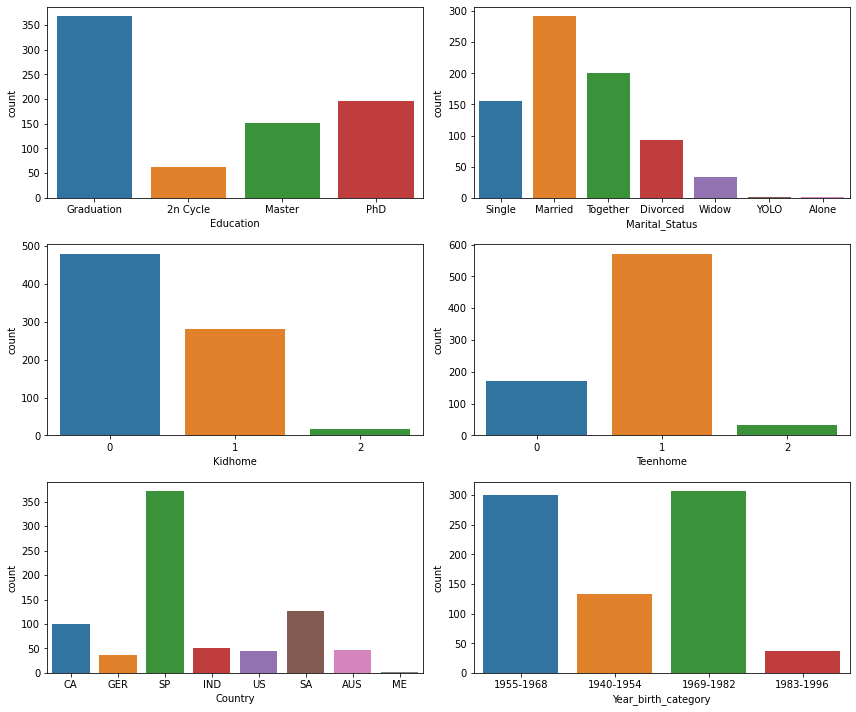

In [163]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(12,10))
sns.countplot(ax=ax[0, 0],x='Education',data=Cluster_3)
sns.countplot(ax=ax[0, 1],x='Marital_Status',data=Cluster_3)
sns.countplot(ax=ax[1, 0],x='Kidhome',data=Cluster_3)
sns.countplot(ax=ax[1, 1],x='Teenhome',data=Cluster_3)
sns.countplot(ax=ax[2,0], x='Country', data=Cluster_3)
sns.countplot(ax=ax[2,1], x='Year_birth_category', data=Cluster_3)

fig.tight_layout()

In [164]:
#Spending Habits
cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for x in cols:
    print('The average {} for cluster 3 is '.format(x), Cluster_3[x].mean())

The average MntWines for cluster 3 is  290.23264781491
The average MntFruits for cluster 3 is  18.566838046272494
The average MntMeatProducts for cluster 3 is  98.25192802056556
The average MntFishProducts for cluster 3 is  25.131105398457585
The average MntSweetProducts for cluster 3 is  17.80719794344473
The average MntGoldProds for cluster 3 is  45.63239074550128


In [165]:
#Purchasing Behavior
parameter = ['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases']
for x in parameter:
    print('The average {} for cluster 1 are '.format(x), Cluster_3[x].mean())

The average NumStorePurchases for cluster 1 are  6.093830334190232
The average NumWebPurchases for cluster 1 are  4.744215938303342
The average NumCatalogPurchases for cluster 1 are  2.2647814910025708


**After the in depth analysis of clusters we describe findings to create specific customer segments.**

Cluster 1: Lower Income, Occasionals and Parents of kids.
- Younger people
- Low Income
- Very probable the presence of at least 1 kid.
- Very low wine amounts.
- Lower expenditure in general.
- Need to catch them with offers and discounts
- More probable that they will complain, CS need to treat them more careful.
- They buy mostly in Store and through Web in equal measure.

Cluster 2: High Income - Loyals.
- Highest income
- The most LOYAL with an average of 19 purchases per person in the last 2 years.
- The most of them have NO kids, if they have son they are teenagers.
- They spend hugely on things like Wine and Meat and on average they spend more also on the whole selection of goods.
- Need to offer them some premium services or loyalty prizes in order to keep the customer relationship strong.
- They buy largely in Store, on average 8 times, but also in discrete quantity via Web or catalog.




Cluster 3: Middle Income, average loyalty and Parents of teens.
- Middle income
- Good but not great loyalty with 13 purchases in the last 2 years.
- Strong presence of teenagers sons in the house.
- Spend a discrete quantity in wine and groceries but a modest quantity in MeatProducts.
- The segment who uses the most Deals to purchase.
- Preferred channel to purchase is via web, on average 5 times.

**Marketing campaigns performance across the clusters**

In [166]:
#Grouping for Campaign accepted with number of people for each cluster.
Camp1 = backup_df[backup_df['AcceptedCmp1']==1].groupby(['cluster'])['ID'].nunique()
Camp2 = backup_df[backup_df['AcceptedCmp2']==1].groupby(['cluster'])['ID'].nunique()
Camp3 = backup_df[backup_df['AcceptedCmp3']==1].groupby(['cluster'])['ID'].nunique()
Camp4 = backup_df[backup_df['AcceptedCmp4']==1].groupby(['cluster'])['ID'].nunique()
Camp5 = backup_df[backup_df['AcceptedCmp5']==1].groupby(['cluster'])['ID'].nunique()
CampResponse = backup_df[backup_df['Response']==1].groupby(['cluster'])['ID'].nunique()



In [167]:
#creation of the dataframe by concatenating the responses created before.
campaign_performance_cluster = pd.concat([Camp1, Camp2, Camp3, Camp4, Camp5, CampResponse], axis=1)
campaign_performance_cluster.columns = ['Camp1', 'Camp2', 'Camp3', 'Camp4', 'Camp5', 'CampResponse']

In [168]:
campaign_performance_cluster

,Camp1,Camp2,Camp3,Camp4,Camp5,CampResponse
cluster,,,,,,
1,1,NaN,63,3,NaN,85
2,126,18.0,49,93,157.0,164
3,15,12.0,51,68,4.0,84


In [169]:
#Fill null values with 0.
campaign_performance_cluster.fillna(0, inplace=True)

In [170]:
campaign_performance_cluster

,Camp1,Camp2,Camp3,Camp4,Camp5,CampResponse
cluster,,,,,,
1,1,0.0,63,3,0.0,85
2,126,18.0,49,93,157.0,164
3,15,12.0,51,68,4.0,84


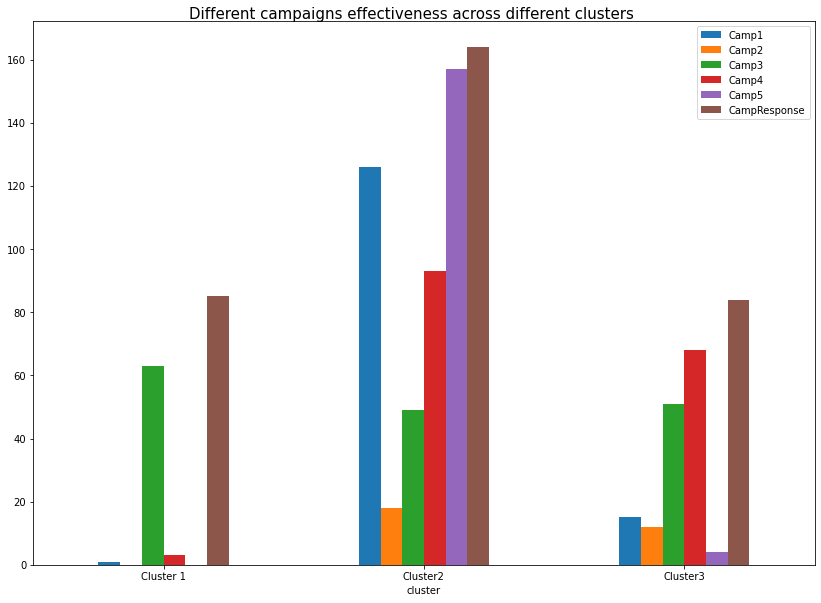

In [171]:
ax = campaign_performance_cluster.plot(kind='bar', figsize=(14, 10))
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Cluster 1', 'Cluster2', 'Cluster3'], rotation = 0)
plt.suptitle('Different campaigns effectiveness across different clusters', fontsize=15, y=0.9);
plt.savefig('cluster_campaign.png')

The marketing campaigns were very effective (except the second one) on the second segment, especially the last one, the fifth and the first one, this highlights that these campaign were well designed for premium customers and marketing department should use them as a starting point for future ones.

Largely across all clusters the **last** campaign was the most effective. One fact that stands out is that the 5th campaign were accepted only by the High Income Loyal cluster, so this highlights once again how responsive is this segment about the marketing efforts.

Campaign 3 was more effective in the Lower income cluster, so it is better if the marketing department targets this cluster to develop strategies incentrated to this campaign. Or, for example offering some special offers on cheap products for kids, being this cluster highly concentrated of them.

In general, people with less kids were more responsive to the campaigns so, if the company prefers to specialize on these type of customers they are performing really well, but if they want to make people spend more on their products even if they have less disposable income, they should start to diversificate the offering of products with more cheap products or special offers well targeted to each particular segment.